In [1]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#https://keras.io/visualization/

In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

/Users/ayub/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
seed=42
np.random.seed(seed)
tf.set_random_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [4]:
X = np.zeros((N * C, D), dtype=np.float64)
y = np.zeros(N * C, dtype=np.float64)

for i in range(C):
    index = 0
    r = np.linspace(0.0, 1.0, N)
    t = np.linspace(
        i * 2 * math.pi / C,
        (i + 2) * 2 * math.pi / C,
        N
    ) + np.random.randn(N) * 0.1
    
    for ix in range(N * i, N * (i + 1)):
        X[ix] = np.multiply(r[index],((np.float64(math.sin(t[index])), np.float64(math.cos(t[index])))))
        y[ix] = i
        index += 1

print("SHAPES:")
print("-------------------")
print("X:"+ str(X.shape))
print("y:"+ str(y.shape))


SHAPES:
-------------------
X:(3000, 2)
y:(3000,)


In [5]:
def plot_model(X, y, model, e=.0, auto=False):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy(),
    w1 = torch.transpose(model.fc1.weight.data, 0, 1).numpy()
    b1 = model.fc1.bias.data.numpy()
    w2 = torch.transpose(model.fc2.weight.data, 0, 1).numpy()
    b2 = model.fc2.bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    if auto is True:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')
    if auto is True:
        plt.axis((xx.min(), xx.max(), yy.min(), yy.max()))
    

In [6]:
def plot_data(X, y, d=.0, auto=False):
    """
    Plot the data.
    """
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    if auto is True: plt.axis('equal')
#     plt.savefig('spiral{:.2f}.png'.format(d))

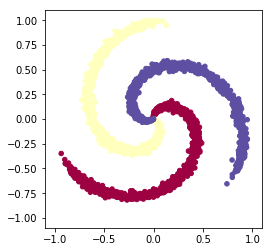

In [7]:
# Create the data
plot_data(X, y)

# Linear model

In [8]:
training_epochs = 500
n_neurons_in_h1 = 60
n_neurons_in_h2 = 60
learning_rate = 0.2
epochs = 100

N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_unit
n_features = N*C*D
n_classes =N*C

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(H, activation='linear', input_shape=(2,)),
    keras.layers.Dense(C, activation='softmax')
])

model.compile(optimizer=keras.optimizers.SGD(lr=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Summarize the model
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
training_history = model.fit(X, y, epochs=epochs, verbose=0)
print("Average test loss: ", np.average(training_history.history['loss']))
print("Average test loss: ", np.average(training_history.history['acc']))

Average test loss:  0.754621511356036
Average test loss:  0.56056666


# Two-layered network

In [10]:
learning_rate = 1e-3
lambda_l2 = 1e-5

model = keras.Sequential([
    keras.layers.Dense(H, activation='relu', input_shape=(2,)),
    keras.layers.Dense(C, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate, decay=lambda_l2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
training_history = model.fit(X, y, epochs=epochs, verbose=0)
print("Average test loss: ", np.average(training_history.history['loss']))
print("Average test loss: ", np.average(training_history.history['acc']))

Average test loss:  0.20135765384318385
Average test loss:  0.9818033


# Proper training procedure

# Create datasets

In [20]:
learning_rate = 1e-3
lambda_l2 = 1e-5
dropout_p = 0.1
decay_rate = 0.9999
split_ratio = 0.8 # train-test split
batch_size = 64


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

print("We have %i train samples and %i test samples." % (len(X_train), len(X_test)))

We have 600 train samples and 2400 test samples.


In [34]:
model = keras.Sequential([
    keras.layers.Dense(H, activation='relu', input_shape=(2,)),
    keras.layers.Dense(C, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate, decay=lambda_l2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
training_history = model.fit(
    X_train, # input
    y_train, # output
    batch_size=batch_size,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=epochs,
    validation_data=(X_test, y_test)
)
print("Average test loss: ", np.average(training_history.history['loss']))
print("Average test loss: ", np.average(training_history.history['acc'])

Average test loss:  0.1045044058136642
Average test loss:  0.9845167
Average test loss:  0.97407913


In [41]:
def plot_metrics(train_loss, train_acc, test_loss, test_acc):
    """
    Plot the global metrics.
    """
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    
    ax1.plot(train_loss, label='train loss')
    ax1.plot(test_loss, label='test loss')
    ax1.legend(loc=3)
    ax1.set_title('Loss')
    
    ax2.plot(train_acc, label='train accuracy')
    ax2.plot(test_acc, label='test accuracy')
    ax2.legend(loc=4)
    ax2.set_title('Accuracy')
    
    f.tight_layout()

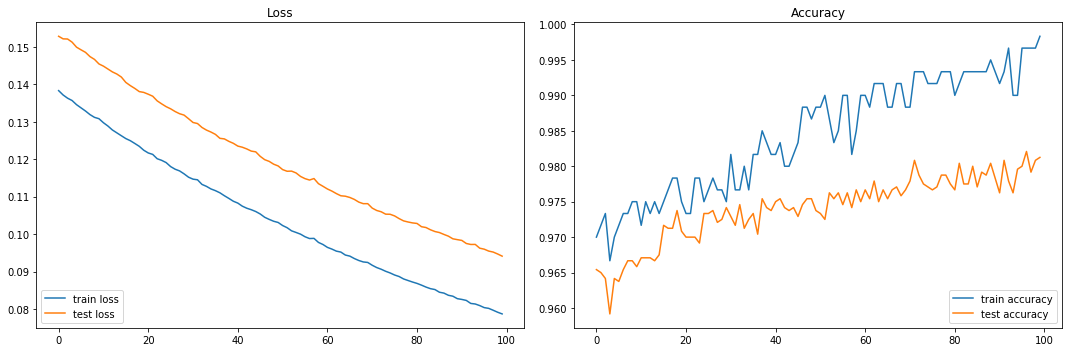

In [43]:
plot_metrics(training_history.history['loss'], training_history.history['acc']
             , training_history.history['val_loss'], training_history.history['val_acc'])
plt.show()

# Save and Load model


In [45]:
# save model
model.save('saved_model/my_model')


In [47]:
# load model
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
